## Introduction

Tanzania is grappling with several pressing issues, including frequent occurrence of severe droughts which have devastating effects on the environment and human settlements. Access to clean water is a major concern in Tanzania. Only 55% of the population has access to improved water sources, and a mere 44% have piped water. This shortage has significant implications for public health, food security, and economic development. Rural areas are particularly affected, with many communities relying on informal and often unreliable sources of water.  

### Business understanding
Access to clean water is a fundamental human right, yet millions of people in Tanzania lack reliable access to safe drinking water. Investment has been done heavily on drilling water wells, but many of these wells are non-functional, leaving communities without access to this essential resource. The lack of functional water wells has severe consequences, including increased risk of waterborne diseases, reduced economic productivity, and decreased quality of life.

The goal of this project is to develop a predictive model that can identify which water wells are likely to be non-functional, allowing the Tanzanian government and other stakeholders to target their efforts more effectively, improving the lives of thousands of people. Our model can be used to inform data-driven decision making, optimize maintenance and repair efforts, and ultimately reduce the number of communities without access to safe drinking water.

#### Stakeholders
- Local Communities: Direct beneficiaries of functional wells.
- Non-Governmental Organizations (NGOs): Organizations funding and supporting water projects.
- Government Agencies: Involved in water resource management and infrastructure.
- Data Scientists and Analysts: Responsible for analyzing data to guide decision-making.


#### Objectives

- Develop a predictive model that can accurately classify wells as functional or non-functional
- Evaluate the performance of different machine learning models and select the best one
- Provide recommendations for improving the accuracy of well functionality predictions.

### Data Understanding

The data for this project comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water. The data is suitable for this project because it provides a comprehensive overview of the water wells in Tanzania, including their characteristics and status. We can use it to identify patterns and relationships between different features, which can inform our predictive models to determine the funcionality of water wells.

It is divided into three CSV files: a training set containing 59,400 observations (80%) and a test set containing 14,850 observations (20%). The third dataset contains training set labels that detail status group information for each of the training set values indicating whether the pump is “functional”, “non-functional”, or “in need of repairs”. Both the train and test datasets have 40 similar columns with information about water pumps in Tanzania.

The limitations of the dataset are;
   - The data is limited to water wells in Tanzania and may not be representative of water wells in other countries.
   - The data does not include information on the maintenance history of the wells, which can affect their status.

Hence models developed may not be generalizable to other countries or contexts, and may not capture the full range of factors that affect the status of water wells.

### Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing the csv files
training_set_values = pd.read_csv("training_set_values.csv")
test_set_values = pd.read_csv("test_set_values.csv")
training_set_labels = pd.read_csv("training_set_labels.csv")

In [3]:
def explore_datasets():
    
    # Explore the structure of datasets
    def explore_structure(data, name):
        print(f"Structure of {name}:")
        print(data.info())
        print("\n")

    explore_structure(training_set_values, "training_set_values")
    explore_structure(test_set_values, "test_set_values")
    explore_structure(training_set_labels, "training_set_labels")
    
    # Display the first few rows of the datasets
    def explore_first_few_rows(data, name):
        print(f"First few rows of {name}:")
        print(data.head())
        print("\n")
    explore_first_few_rows(training_set_values, "training_set_values")
    explore_first_few_rows(test_set_values, "test_set_values")
    explore_first_few_rows(training_set_labels, "training_set_labels")
   
   #Display if there are any missing values
    def explore_missing_values(data, name):
        print(f"Distribution of {name}:")
        print(data.isna().sum())
        print("\n")
    explore_missing_values(training_set_values, "training_set_values")
    explore_missing_values(test_set_values, "test_set_values")
    explore_missing_values(training_set_labels, "training_set_labels")
   
   # Call the function
explore_datasets()

Structure of training_set_values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code       

Train set has 59400 water points data with 40 features. Train labels data has 59400 same water points with train set but just has information about id of these points and status of them.
The index numbers in two data sets look same but it is impossible to check the nearly 60000 points. So, to make sure we assign data sets 'id' as index and after that merge them.

In [4]:
training_set_values.set_index('id',inplace=True) 
training_set_labels.set_index('id',inplace=True)
df = pd.merge(training_set_labels, training_set_values, how = 'inner', left_index = True,right_index=True)
df.reset_index(names=['new_id'])

,new_id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lga

In [6]:
obj_df = df.select_dtypes(include=['object']) 
obj_df.nunique()

status_group                 3
date_recorded              356
funder                    1896
installer                 2145
wpt_name                 37399
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           11
scheme_name               2695
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64

#### Missing values
scheme_name has the most missing values,other columns with missing values are; funder, installer, public_meeting, scheme_management, permit, and subvillage. 

#### Duplicate and Similar Data
The following columns all contain duplicate or similar data, will remove features that will cause multicollinearity:

- extraction_type, extraction_type_group, and extraction_type_class
- payment and payment_type
- water_quality and quality_group
- quantity and quantity_group
- source and source_type
- waterpoint_type and waterpoint_type_group
- region and region_code
- management and management_group

#### Data types
wpt_name, subvillage, ward, scheme_name, installer, funder, and date_recorded are categorical features that have unique values in the thousands. This will be a problem with dummy variables, will likely remove or feature engineer.

I will drop recorded_by as it has the same value for all rows.

public_meeting and permit are boolean.

I will clean the dataset by removing similar and unnecessary columns and trim the dataset. I will also further investigate whether some columns contain the same information if it was not immediately obvious.

In [7]:
df.drop(columns=['scheme_name', 'funder','installer', 'public_meeting','permit','subvillage','management_group','scheme_management',
                 'quantity_group','source_type','quality_group','payment_type','extraction_type_class','recorded_by','extraction_type', 
                 'waterpoint_type_group','region_code','wpt_name','ward', 'date_recorded'],inplace=True )

In [8]:
df

,status_group,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,district_code,lga,population,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,5,Ludewa,109,1999,gravity,vwc,pay annually,soft,enough,spring,groundwater,communal standpipe
8776,functional,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,2,Serengeti,280,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
34310,functional,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,4,Simanjiro,250,2009,gravity,vwc,pay per bucket,soft,enough,dam,surface,communal standpipe multiple
67743,non functional,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58,1986,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
19728,functional,0.0,0,31.130847,-1.825359,0,Lake Victoria,Kagera,1,Karagwe,0,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,functional,10.0,1210,37.169807,-3.253847,0,Pangani,Kilimanjaro,5,Hai,125,1999,gravity,water board,pay per bucket,soft,enough,spring,groundwater,communal standpipe
27263,functional,4700.0,1212,35.249991,-9.070629,0,Rufiji,Iringa,4,Njombe,56,1996,gravity,vwc,pay annually,soft,enough,river,surface,communal standpipe
37057,functional,0.0,0,34.017087,-8.750434,0,Rufiji,Mbeya,7,Mbarali,0,0,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,groundwater,hand pump


In [9]:
#Summary statistics
# Summary statistics of numerical features
print("Summary statistics of numerical features:")
numerical_stats = df.describe()
print(numerical_stats)
print("\n")
    
# Summary statistics of categorical features
print("Summary statistics of categorical features:")
categorical_stats = df.describe(include=['object'])
print(categorical_stats)

Summary statistics of numerical features:
          amount_tsh    gps_height     longitude      latitude   num_private  \
count   59400.000000  59400.000000  59400.000000  5.940000e+04  59400.000000   
mean      317.650385    668.297239     34.077427 -5.706033e+00      0.474141   
std      2997.574558    693.116350      6.567432  2.946019e+00     12.236230   
min         0.000000    -90.000000      0.000000 -1.164944e+01      0.000000   
25%         0.000000      0.000000     33.090347 -8.540621e+00      0.000000   
50%         0.000000    369.000000     34.908743 -5.021597e+00      0.000000   
75%        20.000000   1319.250000     37.178387 -3.326156e+00      0.000000   
max    350000.000000   2770.000000     40.345193 -2.000000e-08   1776.000000   

       district_code    population  construction_year  
count   59400.000000  59400.000000       59400.000000  
mean        5.629747    179.909983        1300.652475  
std         9.633649    471.482176         951.620547  
min         0

#### Exloratory Data Analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

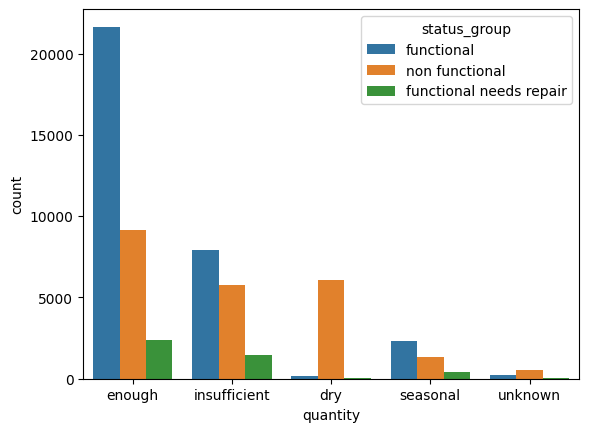

In [11]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

It can be seen obviously that although there are enough water quantity in some wells, they are non-functional. When looking at this graph, dry quantity water points have a highly correlation with non-functionality. If the water point is dry or unknown, there is high chance the water point is non functional. On the other hand, if the quantity is enough, there is a higher chance to find functional water points.

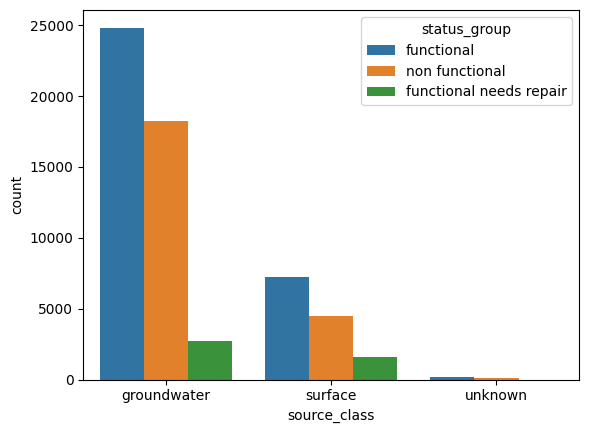

In [12]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

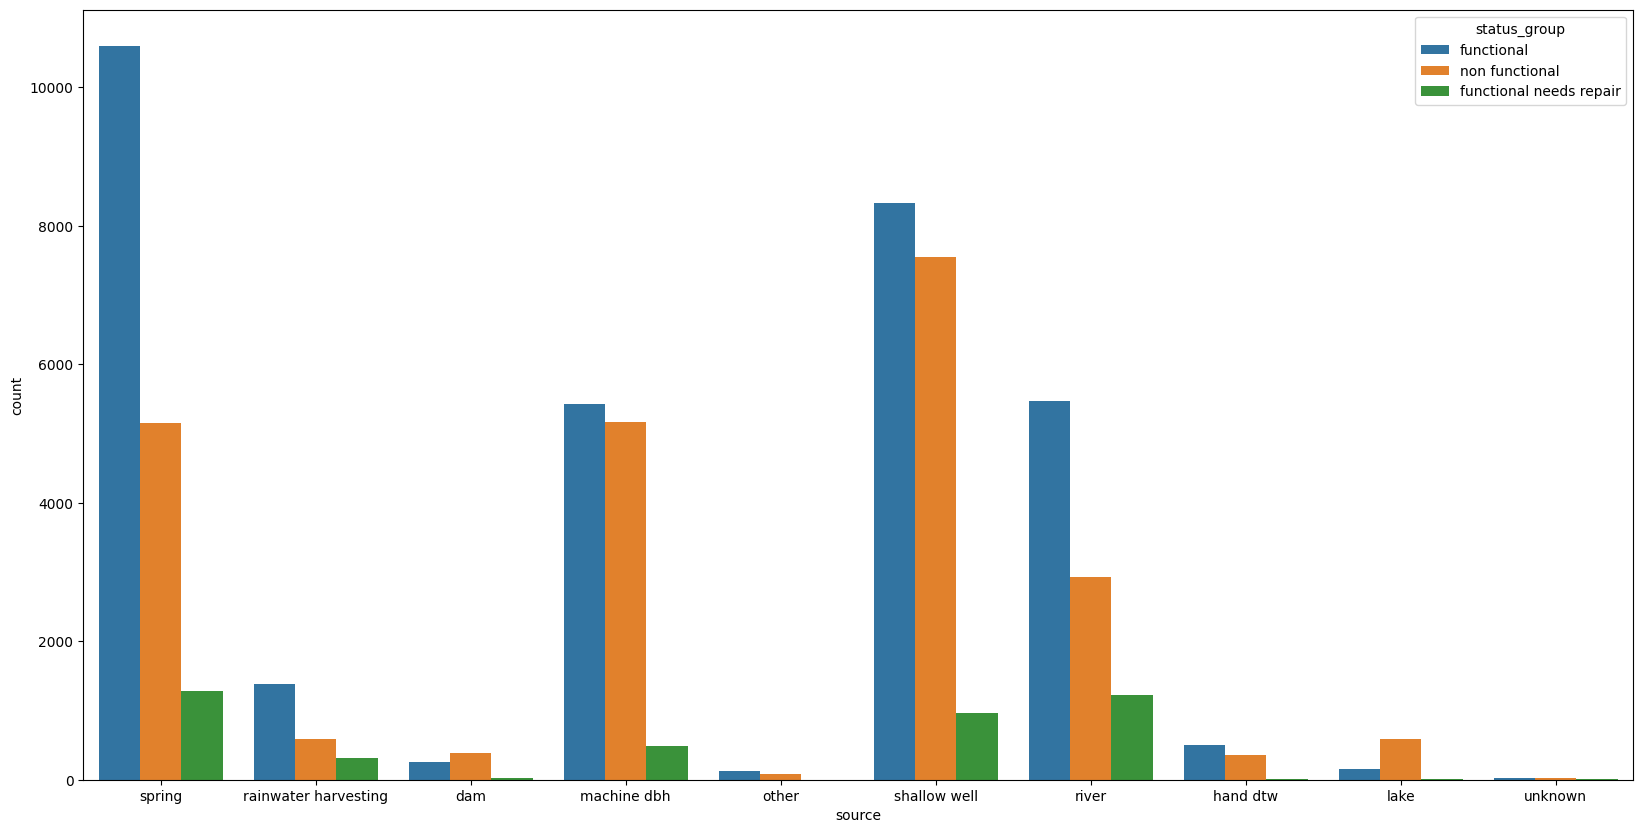

In [13]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

When we look at the columns, there are lots of non-functional ground water. And, it is interesting that machine dbh and swallow well sources nearly have same functional and non-functional waterpoints.

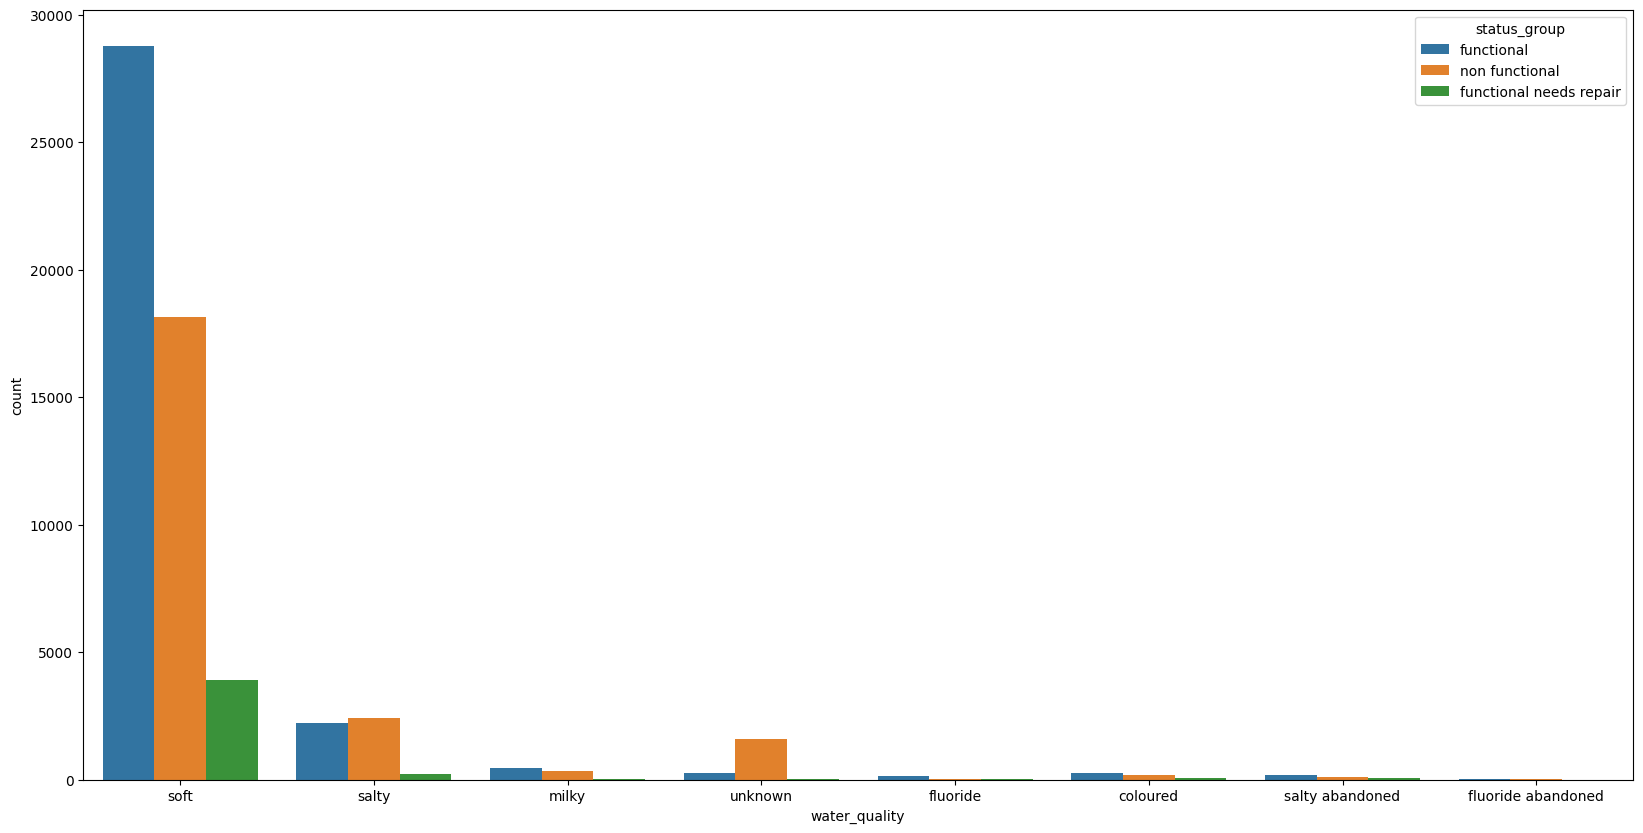

In [14]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

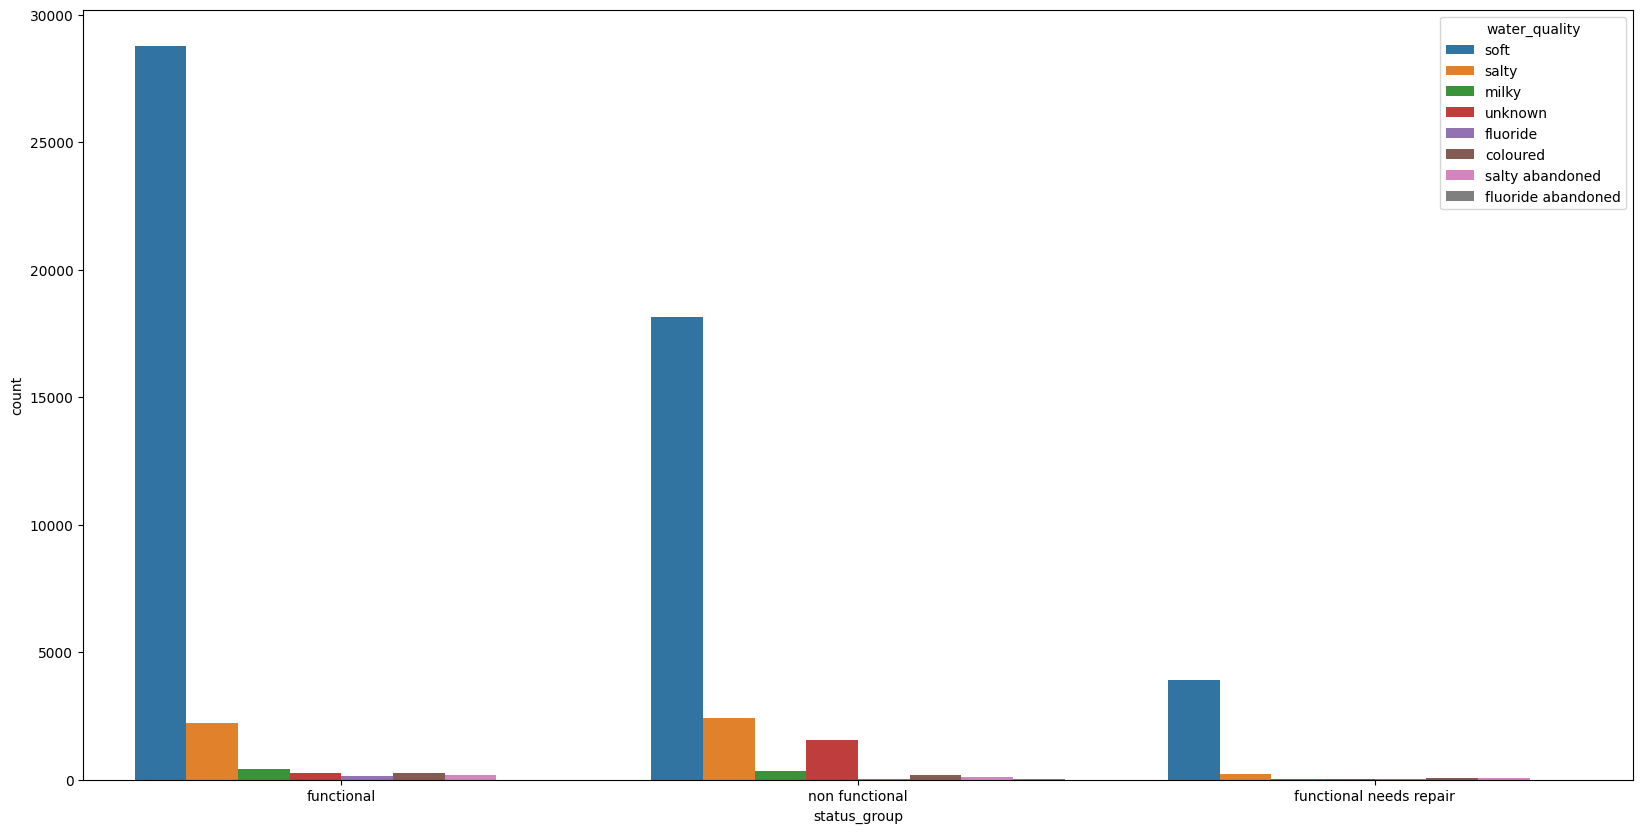

In [15]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)

Lots of non-functional water points have soft, good water quality.

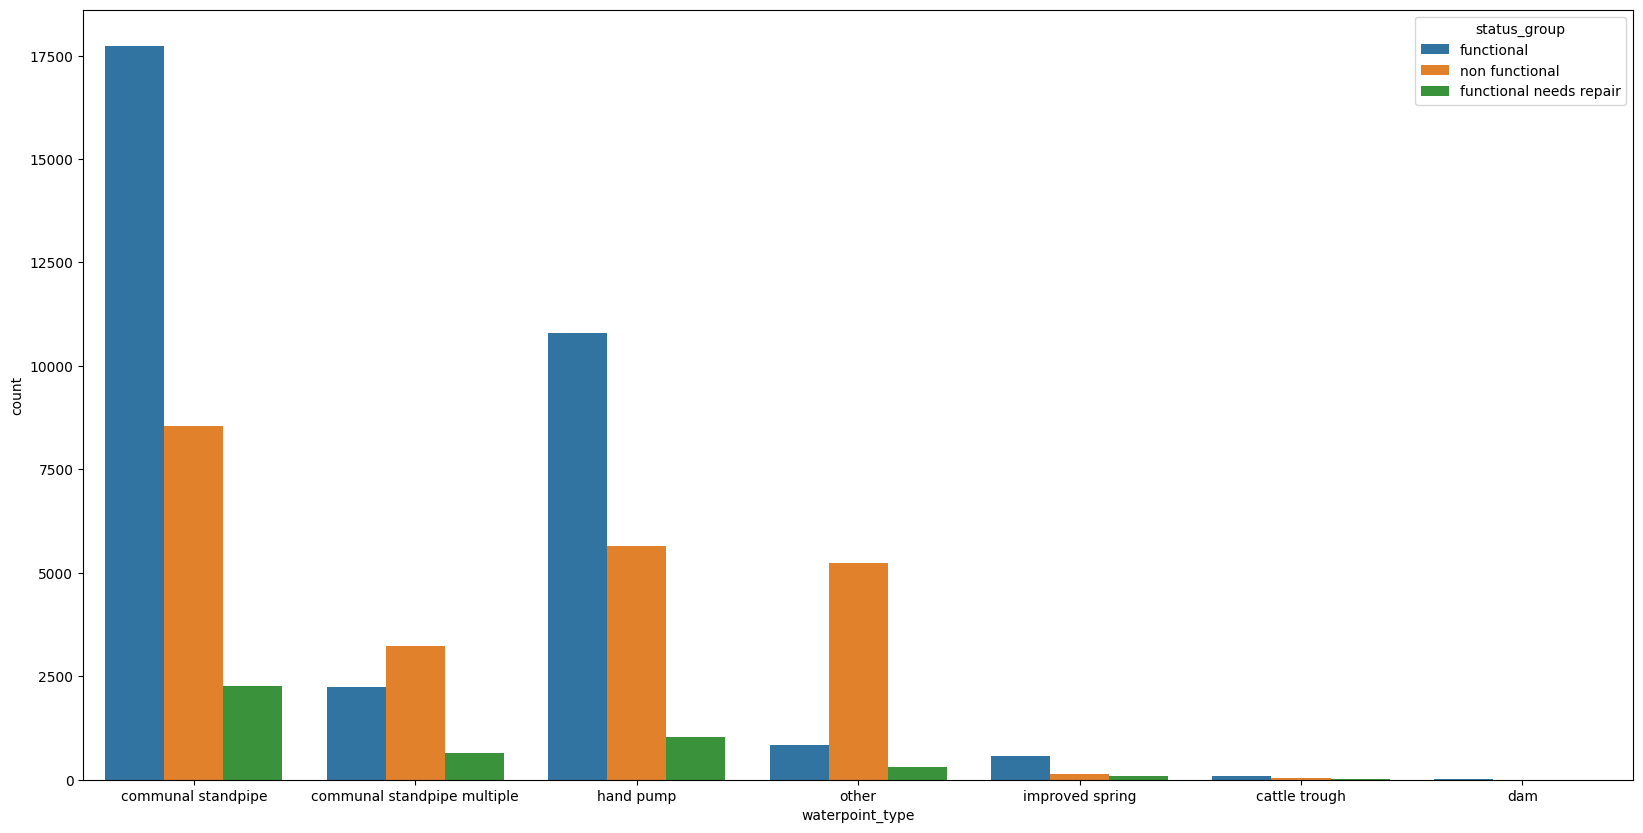

In [16]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

It can be seen that waterpoint type has correlation with funtionality of water points. Such that, communal standpipe has higher possibility to have functional, although communal standpipe multiple and others have higher possibility for non-functionality.

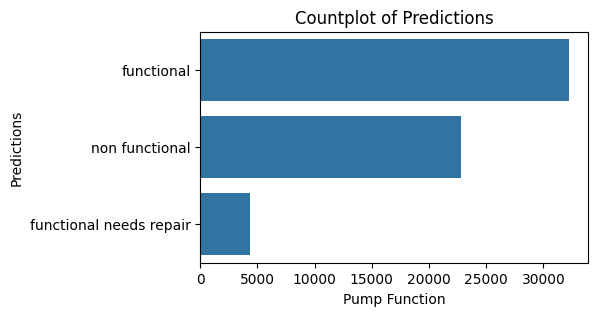

In [17]:
# Distribution of target variable.
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(df['status_group'])
x_labels = df['status_group'].unique()

#labels
plt.title('Countplot of Predictions')
plt.xlabel('Pump Function')
plt.ylabel('Predictions')
plt.show()

We notice that the target classes are imbalanced, with the functional pumps being the most common at more than 30,000 followed by non-functional pumps at over 20,000 pumps, and the lastly the funcational-need-repair pumps at less 5,000.

##### Checking for outliers

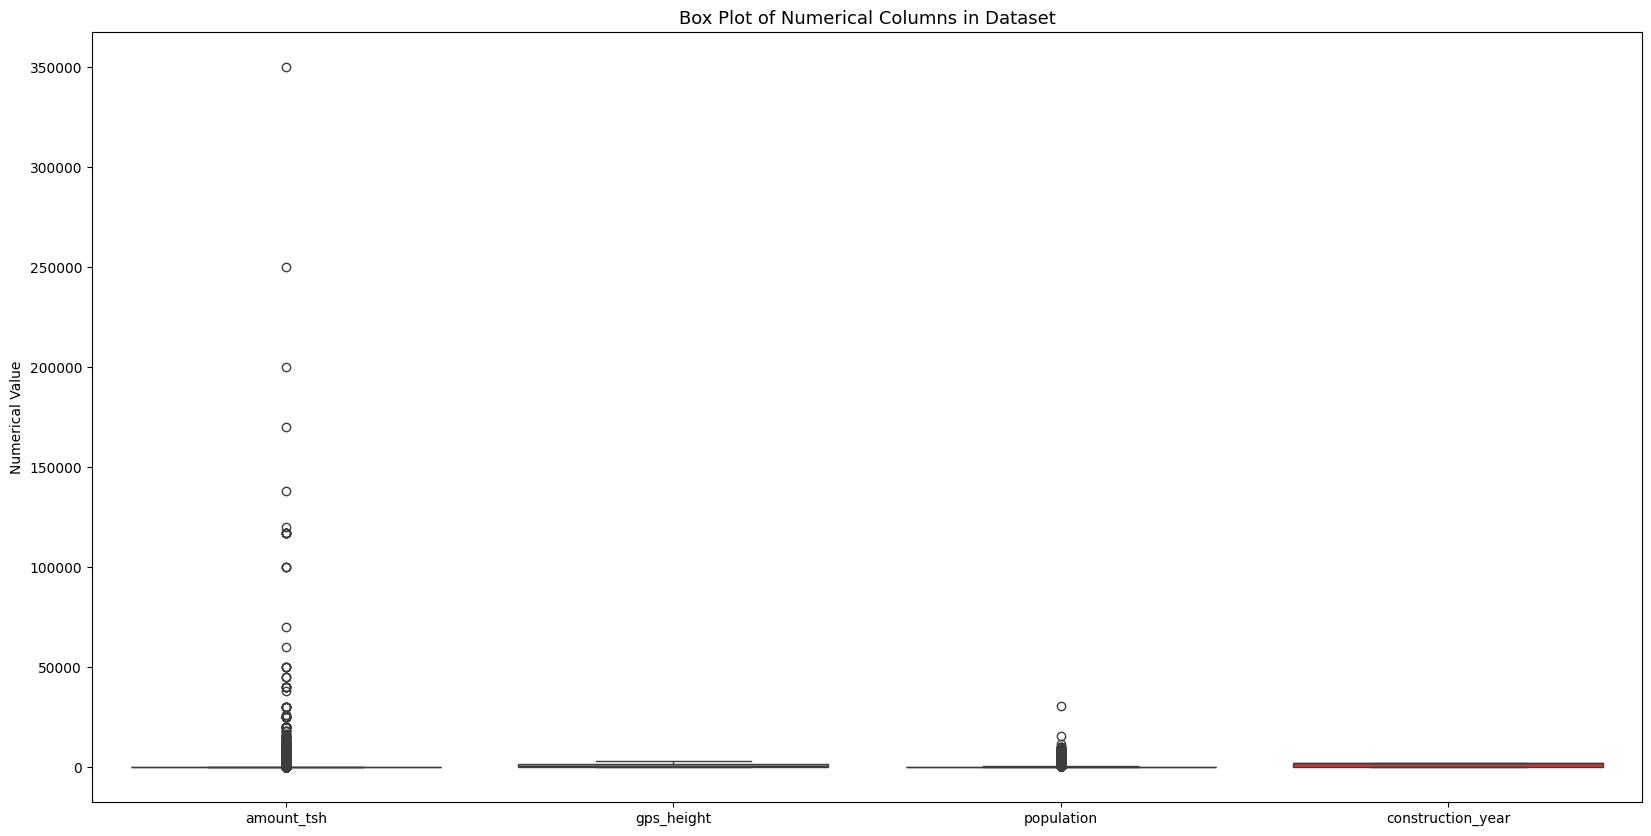

In [18]:
# Plotting box plots of numerical columns
numerical_cols = ['amount_tsh', 'gps_height', 'population', 'construction_year']
plt.figure(figsize=(20, 10))
sns.boxplot(data=[df[col] for col in numerical_cols])
plt.title("Box Plot of Numerical Columns in Dataset", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0,4), numerical_cols)
plt.show()

In [19]:
df['amount_tsh'].value_counts()

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64

Though it seems to exist outliers in the amount_tsh column, this could not necessarily be the case. The high number of zero values are making non-zero values appear as outliers.

In [20]:
df['construction_year'].value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

There are 20,709 entries with 0 for the construction_year. There are atleast different types of sources and therefore; some of these could be natural springs that were never constructed or drilled. Some could also have been the old wells which unfortunately, date records were not properly preserved. Given the huge proportion of such entries, I will replace the zero year with 1954 as a placeholder year.

In [21]:
df['construction_year'] = df['construction_year'].replace(to_replace=0, value=1955)

In [22]:
# Check whether there are duplicates
df.duplicated(keep = 'first').sum()

1406

In [23]:
# Remove duplicates
df.drop_duplicates(keep='first', inplace=True)


### Data Preprocessing

 For preprocessing data for modeling you first have to create dummies for our categorical columns and perform a train-test-split to prevent data leakage.

In [24]:
# Create lists of categorical and continuous columns
cat_col = ['status_group','basin','region','extraction_type_group','management','payment','water_quality',
           'quantity','source','source_class','waterpoint_type']

cont_col = ['amount_tsh','gps_height','longitude','latitude', 'num_private' ,'district_code','population','construction_year']

##### Defining X and y variables

In [25]:
# Assign status_group column to y series
y = df['status_group']
X = df.drop('status_group', axis=1)

In [26]:
# One hot encoding
#Create dummies
dummy_df= pd.get_dummies(df, columns=cat_col)

dummy_df

,amount_tsh,gps_height,longitude,latitude,num_private,district_code,lga,population,construction_year,status_group_functional,...,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,5,Ludewa,109,1999,True,...,True,False,False,False,True,False,False,False,False,False
8776,0.0,1399,34.698766,-2.147466,0,2,Serengeti,280,2010,True,...,False,True,False,False,True,False,False,False,False,False
34310,25.0,686,37.460664,-3.821329,0,4,Simanjiro,250,2009,True,...,False,True,False,False,False,True,False,False,False,False
67743,0.0,263,38.486161,-11.155298,0,63,Nanyumbu,58,1986,False,...,True,False,False,False,False,True,False,False,False,False
19728,0.0,0,31.130847,-1.825359,0,1,Karagwe,0,1955,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,1210,37.169807,-3.253847,0,5,Hai,125,1999,True,...,True,False,False,False,True,False,False,False,False,False
27263,4700.0,1212,35.249991,-9.070629,0,4,Njombe,56,1996,True,...,False,True,False,False,True,False,False,False,False,False
37057,0.0,0,34.017087,-8.750434,0,7,Mbarali,0,1955,True,...,True,False,False,False,False,False,False,True,False,False


##### Train Test Split

I will first split the data into train and test sets. The training set will be 80% of the data and the testing set 20%. I will also maintain a random state of 42 to ensure reproducibility.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)